In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/sample_data/california_housing_test.csv",sep=',', index_col=0)
df.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,,,,,,,,
-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, -122.05 to -119.63
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            3000 non-null   float64
 1   housing_median_age  3000 non-null   float64
 2   total_rooms         3000 non-null   float64
 3   total_bedrooms      3000 non-null   float64
 4   population          3000 non-null   float64
 5   households          3000 non-null   float64
 6   median_income       3000 non-null   float64
 7   median_house_value  3000 non-null   float64
dtypes: float64(8)
memory usage: 210.9 KB


In [3]:
df.describe()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [4]:
l=list(df.columns)
l[0:len(l)-2]

['latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households']

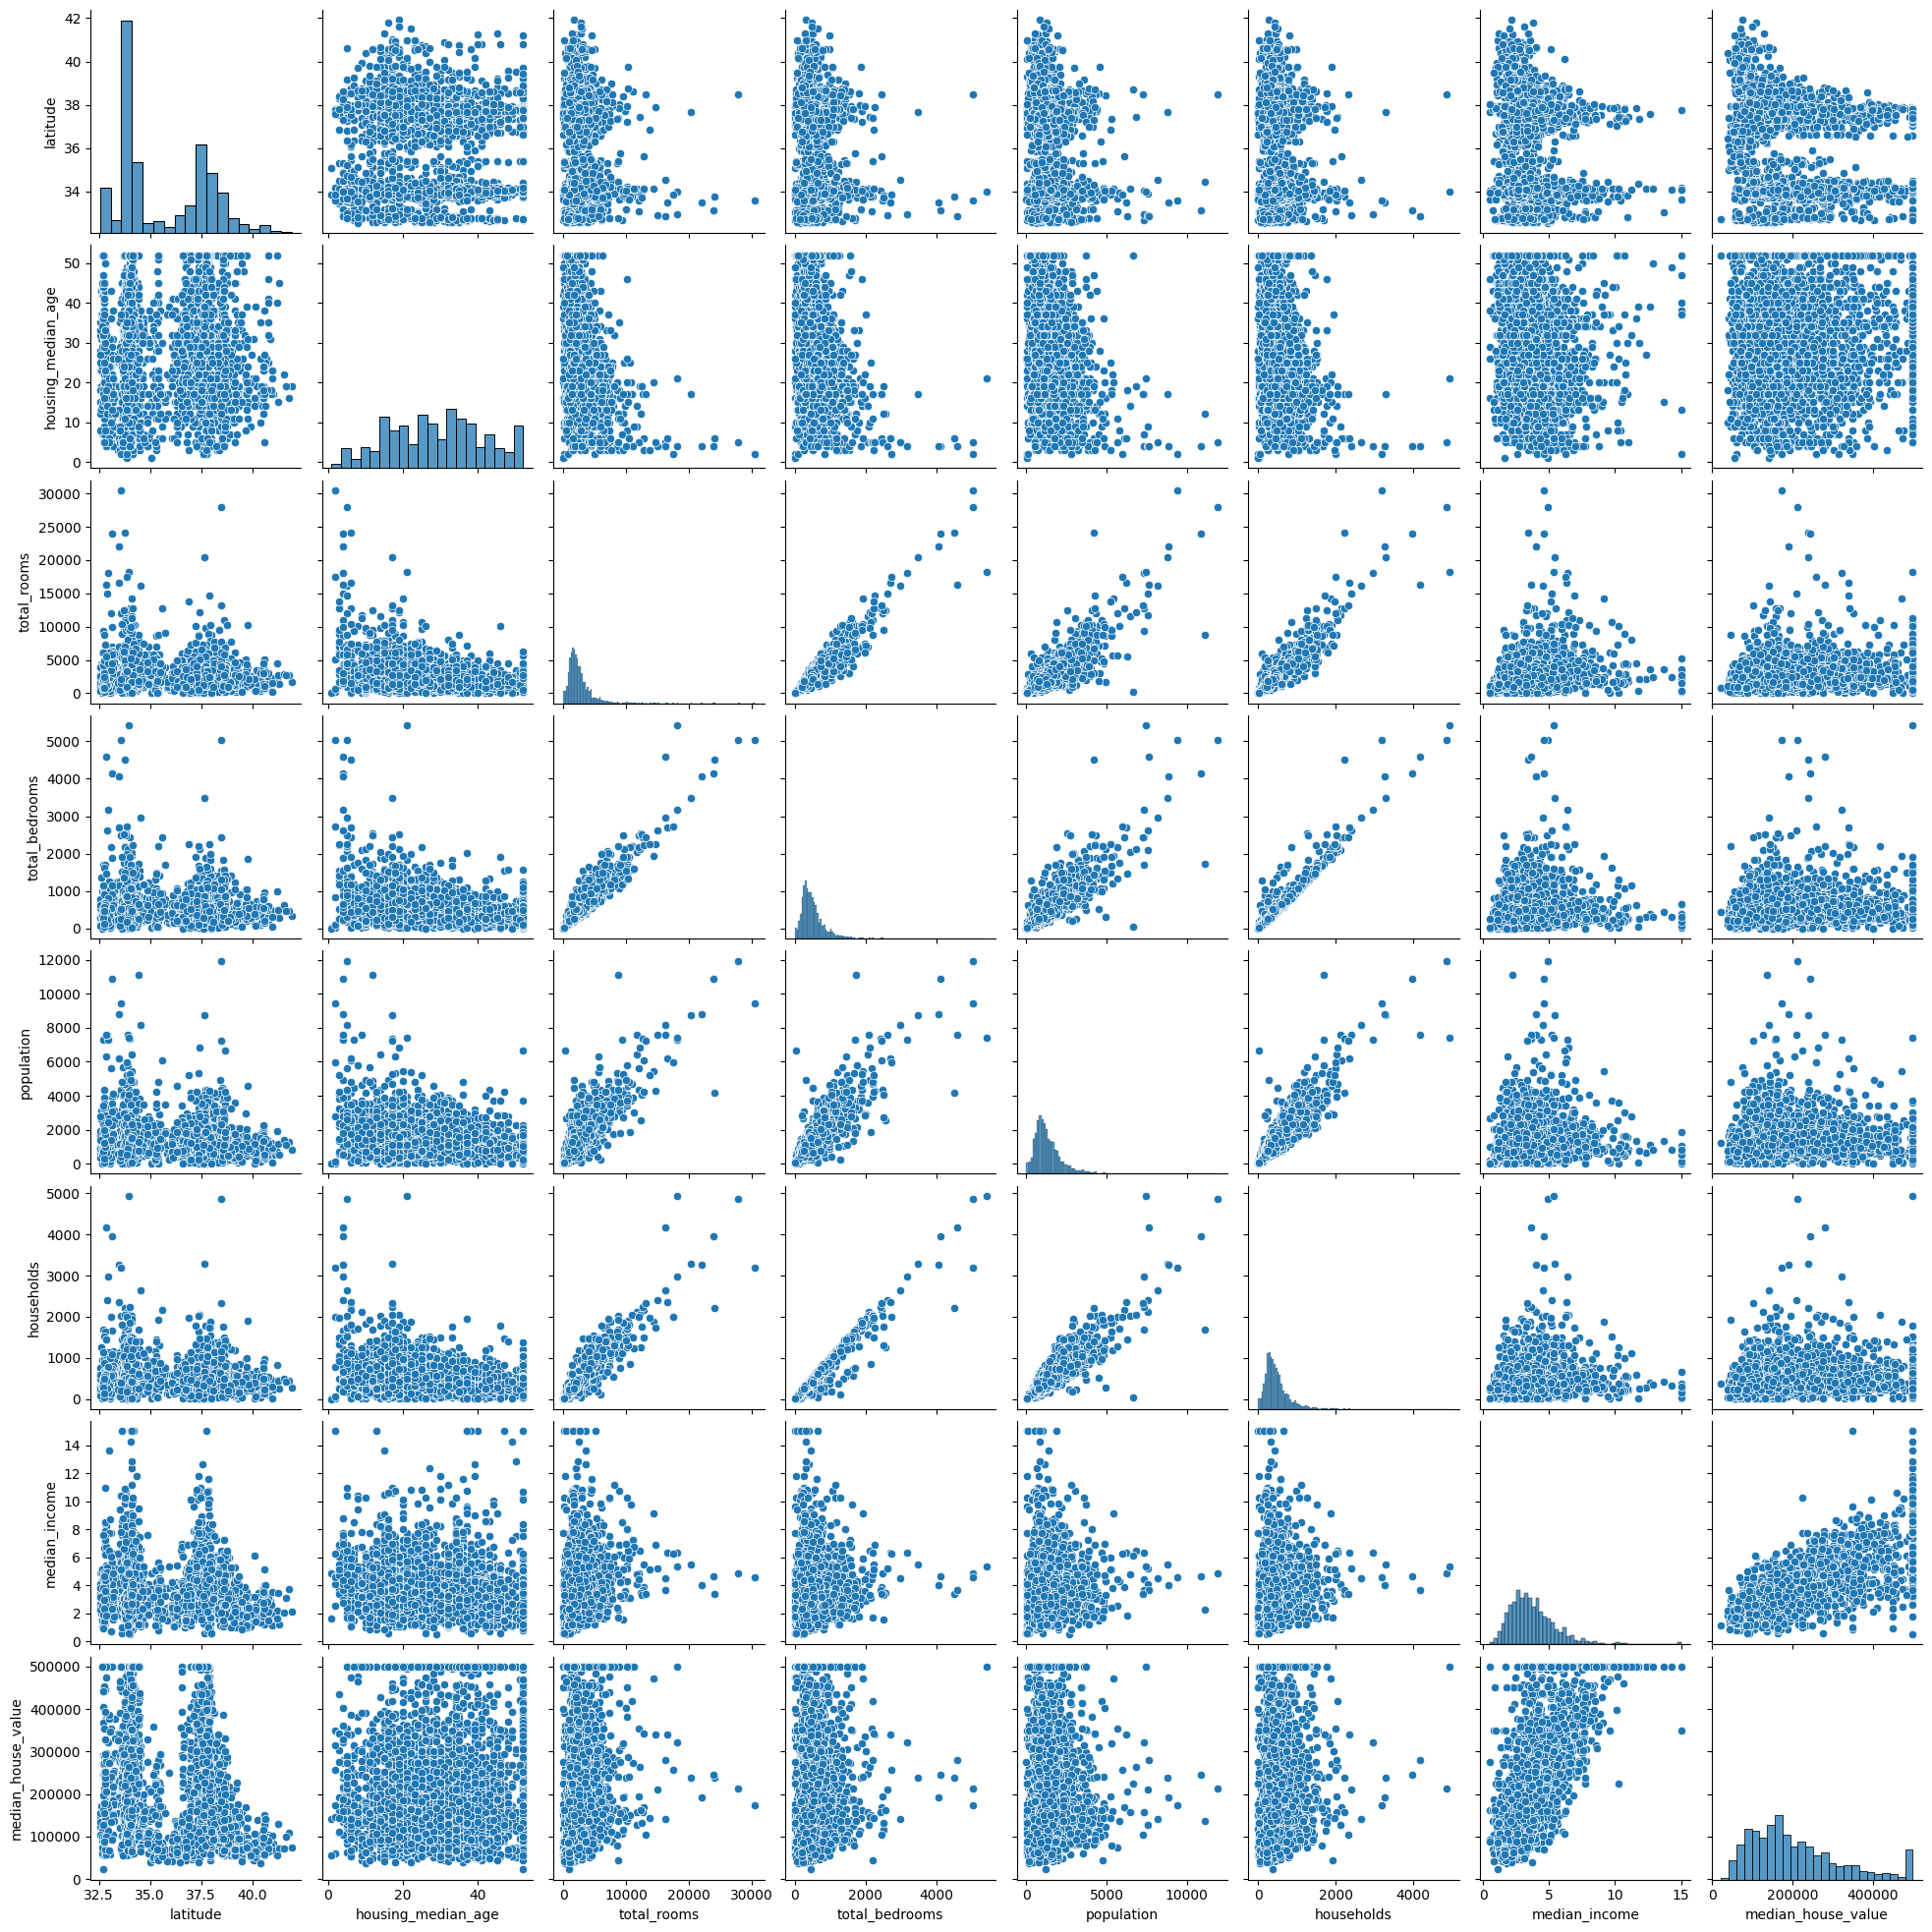

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

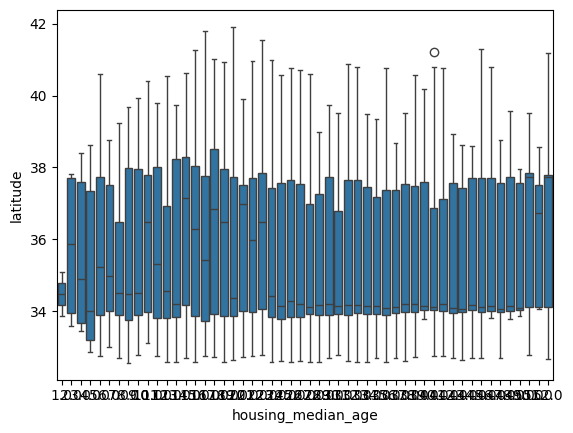

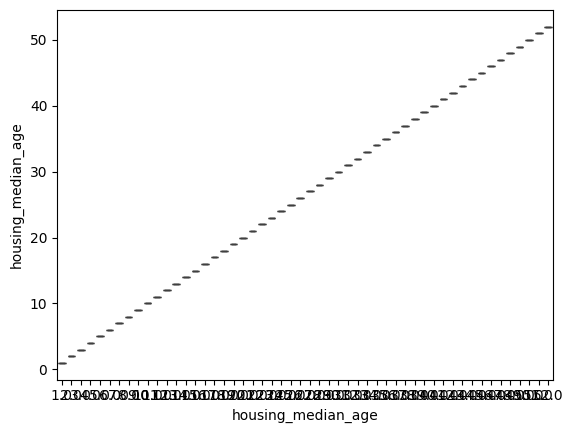

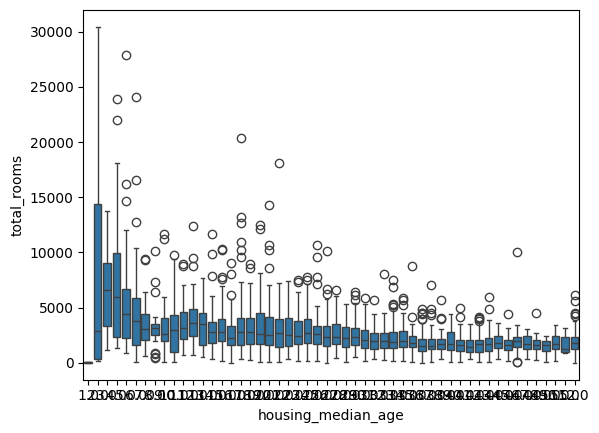

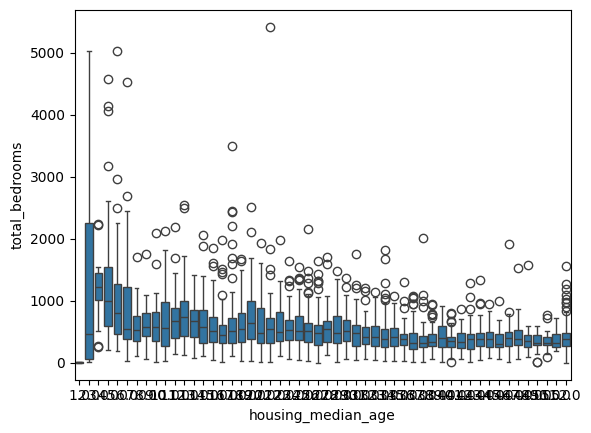

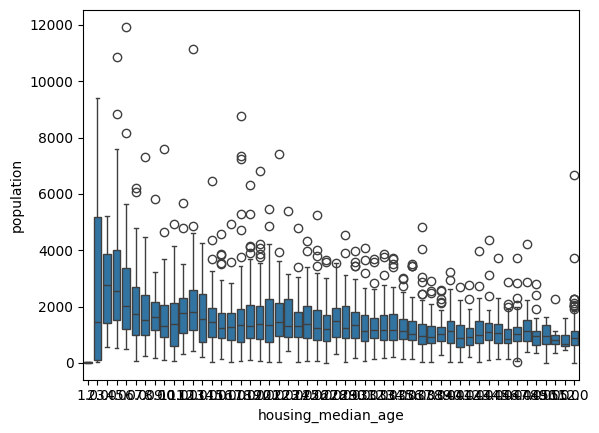

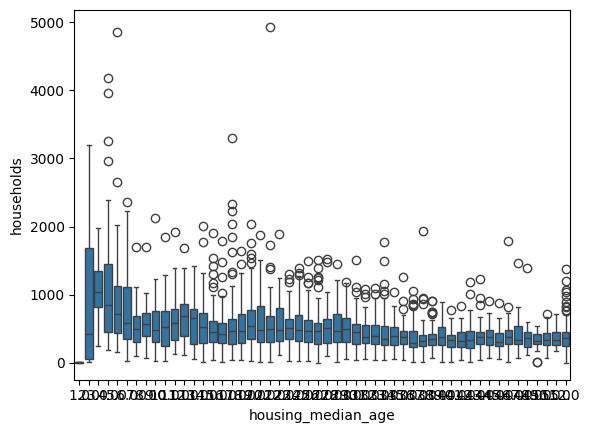

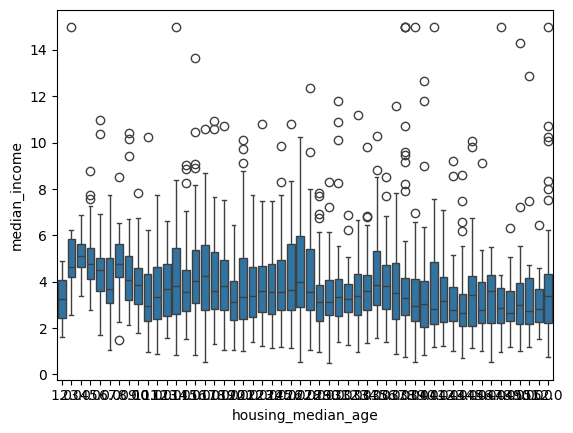

<Figure size 640x480 with 0 Axes>

In [8]:
for i in range(len(l)-1):
    sns.boxplot(x='housing_median_age', y=l[i], data=df)
    plt.figure()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('population',axis=1))
scaled_features = scaler.transform(df.drop('population',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.814633,-0.147000,0.596418,0.315337,0.317734,1.510745,1.227699
1,-0.645931,1.127565,-0.505550,-0.529255,-0.582743,-0.112324,-0.259470
2,-0.871356,-0.147000,0.459078,-0.055225,0.013926,1.071149,0.571647
3,-0.852570,-0.067340,-1.175083,-1.239098,-1.310788,1.255865,1.097726
4,0.326213,-0.784282,-0.630362,-0.688068,-0.692223,-0.469081,-1.097660


In [13]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['population']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['population'],test_size=0.30, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         0
        35.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         0
        47.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        69.0       0.00      0.00      0.00         1
        77.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         1
        83.0       0.00      0.00      0.00         1
        87.0       0.00      0.00      0.00         1
        91.0       0.00      0.00      0.00         0
        94.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [18]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.998


In [19]:
error_rate = []
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

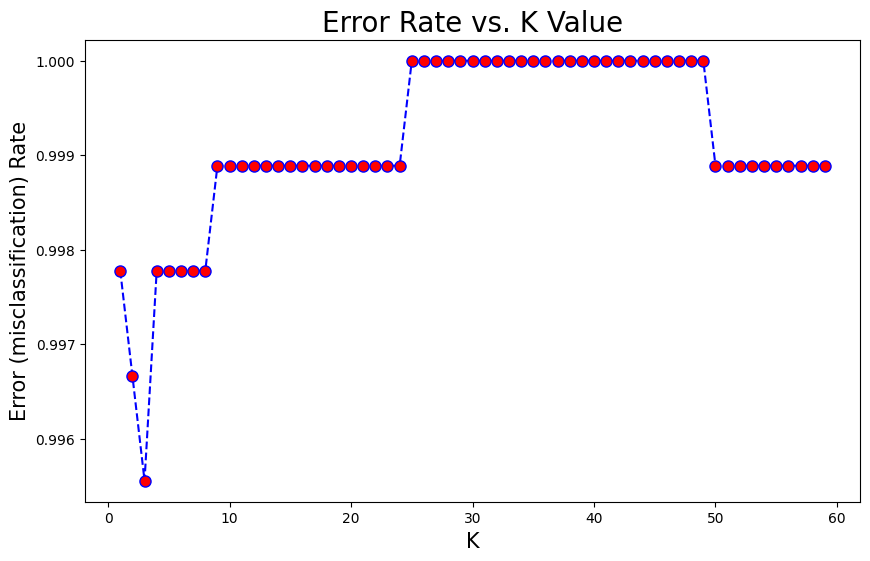

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)